# Logistic Regression in SciKit Learn

## Introduction 

In this lecture, we'll briefly introduce logistic regression with the SciKit Learn package.

## Objectives

You will be able to:

* Understand and implement logistic regression
* Compare testing and training errors

Generally, the process for implementing logistic regression via SciKit Learn is very similar to that which we previously saw. There are a couple exceptions to this. First, rather than using patsy, we simply define y and X by specifying the columns from the dataframe, with no special syntax necessary. That said, if you need to create dummy variables for categorical variables, you must do this in a previous step manually. (See below.) Secondly, SciKit Learn will not display statistical measures such as the P-values associated with the various features. This is a shortcoming of SciKit Learn, although SciKit Learn has other useful tools for tuning models which we will investigate in future lessons.

The other main process of model building and evaluation which we failed to discuss previously is train test split. As we saw in linear regression, train test split is an essential part of model building in order to help determine how our model will generalize to future unseen cases. After all, the point of any model is to provide future predictions where we don't already know the answer but have other informative data (X).

With that, let's take a look at implementing Logistic Regression in SciKit Learn using dummy variables and a proper train-test split.

## Step 1: Import the Data

In [1]:
import pandas as pd

df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [17]:

data = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Survived']]

In [18]:
y = df.pop('Survived')

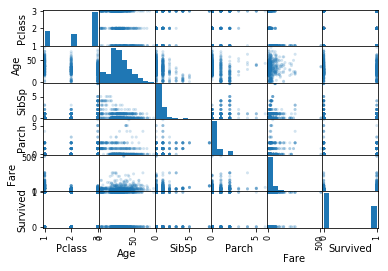

In [19]:
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
X['Sex']
_ = pd.plotting.scatter_matrix(data, alpha=.2)

## Step 2: Define X and y

Note that we first have to create our dummy variables, and then can use these to define X and y.

In [2]:
df = pd.get_dummies(df)
print(df.columns)
df.head()

Index(['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare',
       'Name_Abbing, Mr. Anthony', 'Name_Abbott, Mr. Rossmore Edward',
       'Name_Abbott, Mrs. Stanton (Rosa Hunt)',
       ...
       'Cabin_F G73', 'Cabin_F2', 'Cabin_F33', 'Cabin_F38', 'Cabin_F4',
       'Cabin_G6', 'Cabin_T', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object', length=1731)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,"Name_Abbing, Mr. Anthony","Name_Abbott, Mr. Rossmore Edward","Name_Abbott, Mrs. Stanton (Rosa Hunt)",...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,22.0,1,0,7.2500,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,5,0,3,35.0,0,0,8.0500,0,0,0,...,0,0,0,0,0,0,0,0,0,1


Wow! That's a lot of columns! (Way more then is useful in practice: we now have columns for each of the passengers names. This is an example of what not to do. Let's try that again, this time being mindful of which variables we actually want to include in our model.

In [3]:
df = pd.read_csv('titanic.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
x_feats = ['Pclass', 'Sex', 'Age', 'SibSp', 'Fare', 'Cabin', 'Embarked']
X = pd.get_dummies(df[x_feats])
y = df.Survived
X.head() #Preview our data to make sure it looks reasonable

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,7.2500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,1,38.0,1,71.2833,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,26.0,0,7.9250,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,1,35.0,1,53.1000,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,35.0,0,8.0500,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


## Normalization

Another important model tuning practice is to normalize your data. That is, if the features are on different scales, some features may impact the model more heavily then others. To level the playing field, we often normalize all features to a consistent scale of 0 to 1.

In [5]:
X = X.fillna(value=0) #Fill null values
for col in X.columns:
    X[col] = (X[col]-min(X[col]))/ (max(X[col]) - min(X[col])) #We subtract the minimum and divide by the range forcing a scale of 0 to 1 for each feature

X.head()

,Pclass,Age,SibSp,Fare,Sex_female,Sex_male,Cabin_A10,Cabin_A14,Cabin_A16,Cabin_A19,...,Cabin_F G73,Cabin_F2,Cabin_F33,Cabin_F38,Cabin_F4,Cabin_G6,Cabin_T,Embarked_C,Embarked_Q,Embarked_S
0,1.0,0.2750,0.125,0.014151,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.4750,0.125,0.139136,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1.0,0.3250,0.000,0.015469,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.4375,0.125,0.103644,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.0,0.4375,0.000,0.015713,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


## Train-Test Split

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

## Fit a model
Fit an intial model to the training set. In SciKit Learn you do this by first creating an instance of the regression class. From there, then use the **fit** method from your class instance to fit a model to the training data.

In [8]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(fit_intercept = False, C = 1e12)
model_log = logreg.fit(X_train, y_train)
model_log

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

## Predict
Now that we have a model, lets take a look at how it performs on our test set.

In [9]:
y_hat_test = logreg.predict(X_test)
y_hat_train = logreg.predict(X_train)

In [10]:
import numpy as np
#We could subtract the two columns. If values or equal, difference will be zero. Then count number of zeros.
residuals = np.abs(y_train - y_hat_train)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    568
1    100
Name: Survived, dtype: int64
0    0.850299
1    0.149701
Name: Survived, dtype: float64


Not bad; our classifier was 85% correct for our training data!

In [11]:
residuals = np.abs(y_test - y_hat_test)
print(pd.Series(residuals).value_counts())
print(pd.Series(residuals).value_counts(normalize=True))

0    180
1     43
Name: Survived, dtype: int64
0    0.807175
1    0.192825
Name: Survived, dtype: float64


And still 80% accurate for our test data!

## Summary

In this lesson, we took a more complete look at a data science pipeline for logistic regression, splitting the data into train and test sets and using the model to make predictions. You'll practice this on your own in the upcoming lab before then having a more detailed discussion of more nuanced methods for evaluating our classifier's performance.